# Happiness Index of various countries 


This project gives some statistical details of happiness index of all the countries spread across 7 continents.
The dataset for this project is scarped from wikipedia sites using Beautifulsoup.
The continent to country list is scarped from https://simple.wikipedia.org/wiki/List_of_countries_by_continents
The happiness index dataset is scraped from https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report
These two datasets are later merged to get the complete dataset

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data preprocessing

Scapping list of countries by continent. This is our first dataset.

In [2]:
#Getting the response from wikipedia server
page = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents")
soup = BeautifulSoup(page.content,"html.parser")


In [3]:
#Writing the page_content to a file  
out = open("wikiCountries_html","w",encoding="utf-8")
out.write(str(soup))
out.close()

In [4]:
#printing the title of the page
soup = BeautifulSoup(open("wikiCountries_html",encoding="utf-8"),"html.parser")
title = soup.find('title').get_text()
print(title.strip())

List of countries by continents - Simple English Wikipedia, the free encyclopedia


In [5]:
#continents[] : list of all continents

headers = soup.find_all('h2')
continents = []
for item in headers:
    continents.append(item.get_text().strip().split('[')[0])
continents.remove('Contents')
continents.remove('Antarctica')
del continents[-3:]
print(continents)

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']


In [6]:
#dict_countryContinent : Dictionary consisting of continents as keys and its set of contries as list of values

dict_countryContinent = {}
ordered_list = soup.find_all('ol')

countiCounter = 0
for conti in continents:
    countryASubList = (ordered_list[countiCounter].get_text().strip().split("\n"))
    dict_countryContinent[conti] = countryASubList
    countiCounter = countiCounter + 1
        
print(dict_countryContinent)

{'Africa': ['Algeria - Algiers', 'Angola - Luanda', 'Benin - Porto Novo, Cotonou', 'Botswana - Gaborone', 'Burkina Faso - Ouagadougou', 'Burundi - Gitega', 'Cameroon (also spelled Cameroun) - Yaoundé', 'Cape Verde - Praia', 'Central African Republic - Bangui', "Chad (Tchad) - N'Djamena", 'Comoros - Moroni', 'Republic of the Congo - Brazzaville', 'Democratic Republic of the Congo (Zaire) - Kinshasa', "Côte d'Ivoire (Ivory Coast) - Yamoussoukro", 'Djibouti - Djibouti', 'Equatorial Guinea - Malabo', 'Egypt (Misr) - Cairo', 'Eritrea - Asmara', 'Ethiopia (Abyssinia) - Addis Ababa', 'Gabon - Libreville', 'The Gambia - Banjul', 'Ghana - Accra', 'Guinea - Conakry', 'Guinea-Bissau - Bissau', 'Kenya - Nairobi', 'Lesotho - Maseru', 'Liberia - Monrovia', 'Libya - Tripoli', 'Madagascar - Antananarivo', 'Malawi - Lilongwe', 'Mali - Bamako', 'Mauritania - Nouakchott', 'Mauritius - Port Louis', 'Morocco (Al Maghrib) - Rabat', 'Mozambique - Maputo', 'Namibia - Windhoek', 'Niger - Niamey', 'Nigeria - Ab

In [7]:
#df     : Creating a dataframe from dict_countryContinent
#new_df : stacking all the countries into a single column - country or region

df = pd.DataFrame.from_dict(dict_countryContinent, orient='index')
new_df = df.stack().reset_index(level=1, drop=True).to_frame(name='Country or region')
new_df.reset_index(inplace=True)
new_df = new_df.rename(columns = {'index':'Continents'})
new_df

,Continents,Country or region
0,Africa,Algeria - Algiers
1,Africa,Angola - Luanda
2,Africa,"Benin - Porto Novo, Cotonou"
3,Africa,Botswana - Gaborone
4,Africa,Burkina Faso - Ouagadougou
...,...,...
222,Oceania,Samoa - Apia
223,Oceania,Solomon Islands - Honiara
224,Oceania,Tonga - Nuku'alofa
225,Oceania,Tuvalu - Funafuti


In [8]:
#data_preprocess(country) : removing capital cities and alternative name of the country using split()
def data_preprocess(country):
    var= (country.split("-")[0]).split("(")[0].strip()
    return var

In [9]:
#applying data_preprocess(country) to each country 
new_df['Country or region'] = new_df['Country or region'].apply(data_preprocess)
new_df

,Continents,Country or region
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso
...,...,...
222,Oceania,Samoa
223,Oceania,Solomon Islands
224,Oceania,Tonga
225,Oceania,Tuvalu


Scrapping world happiness report 2019. This acts as our second dataset.

In [10]:
#getting the web response
page_score = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report")
soup_score = BeautifulSoup(page_score.content,'lxml')

out = open("wikiCountriesScore_html","w",encoding="utf-8")
out.write(str(soup_score))
out.close()

soup = BeautifulSoup(open("wikiCountriesScore_html",encoding="utf-8"),"lxml")

title = soup_score.find('title').get_text()
print(title.strip())

World Happiness Report - Wikipedia


In [11]:
#extracting the table and converting it to a dataframe
#df_scoreDataframe : Dataframe consisting of table pf 2019 happiness scores

table = soup.find_all('table',attrs={'class':'wikitable sortable'})
df_score = pd.read_html(str(table))
df_scoreDataframe = pd.DataFrame(df_score[0])
df_scoreDataframe['Country or region'].apply(lambda var : var.strip())
df_scoreDataframe


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111


Merging two datsets with left join 

In [12]:
#Merging the two dataframes and eliminating duplicates and saving it as csv file

df_out = df_scoreDataframe.merge(new_df,on="Country or region",how="left")
df_out = df_out.drop_duplicates(subset='Country or region', keep="first")
df_out.to_csv ('Happiness_index.csv', index = False, header=True)
df_out

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,NaN
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
...,...,...,...,...,...,...,...,...,...,...
151,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028,Africa
152,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486,Africa
153,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081,Africa
154,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111,Africa


In [13]:
#load csv file
df_final = pd.read_csv('Happiness_index.csv')
df_final 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,NaN
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
...,...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028,Africa
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486,Africa
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081,Africa
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111,Africa


# Data visualisation

# World map

In [15]:
#Representing the countries with their happiness score projected on the world map
#By placing the cursor on the country we get its corresponding Happiness Score
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
            autocolorscale = True,
            reversescale = True,
           locations = df_final['Country or region'],
           locationmode = 'country names',
           z = df_final['Score'], 
           text = df_final['Country or region'],
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Global Happiness Score', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))


colormap = go.Figure(data = [data], layout=layout)
iplot(colormap)

# BarPlot

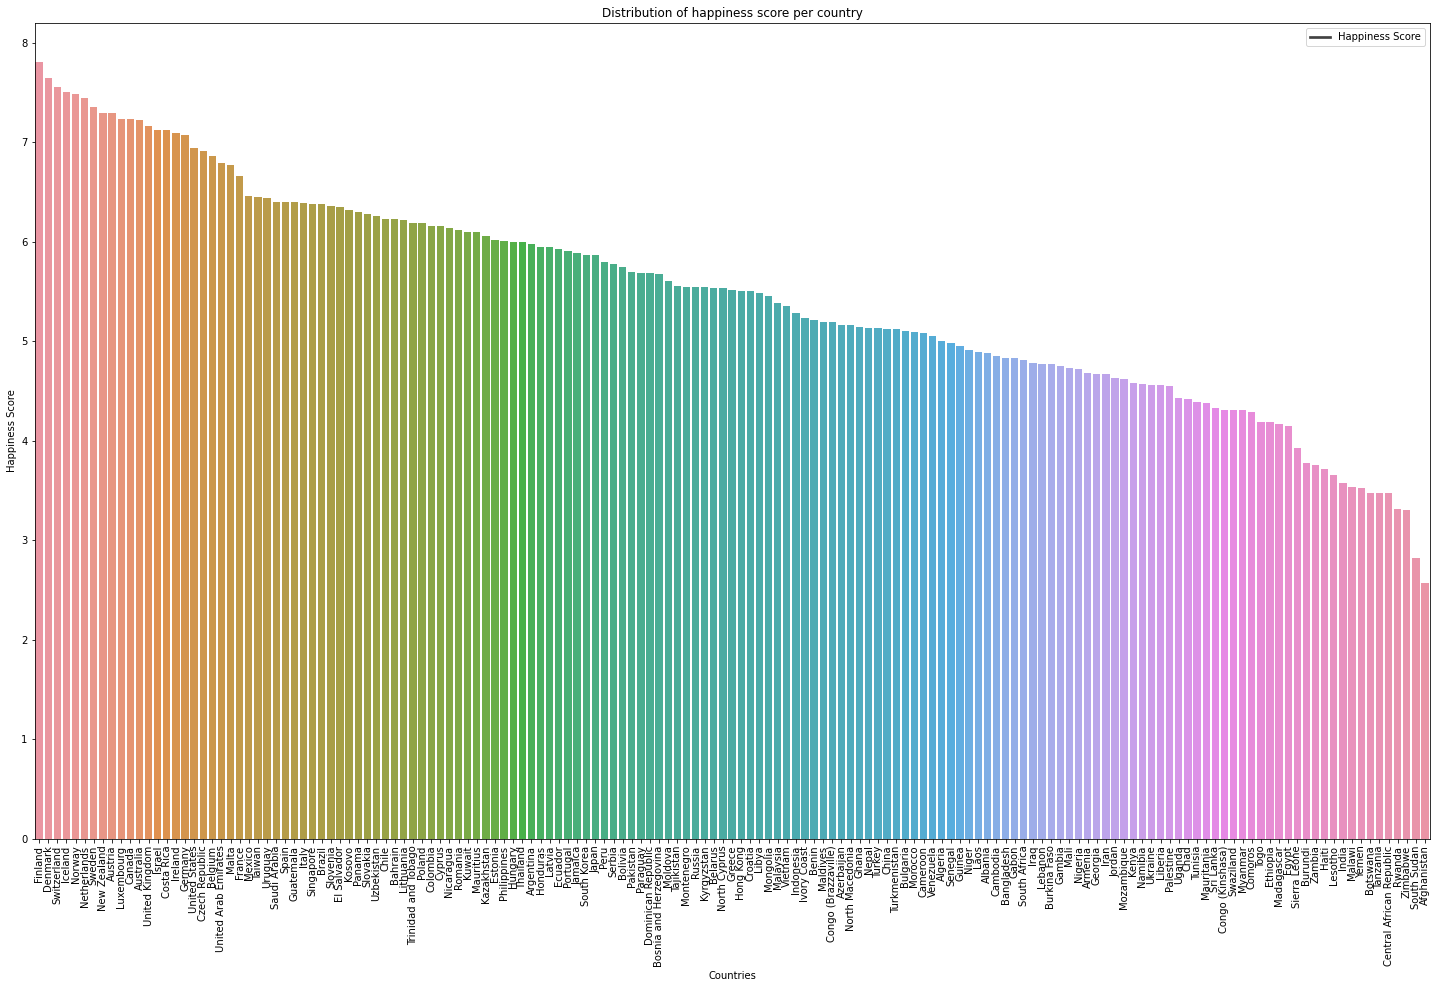

In [14]:
#Plot the distribution of happiness score per country
plt.figure(figsize=(25,15))
sns.barplot(x=df_final['Country or region'], y=df_final['Score'])
plt.xlabel("Countries")
plt.ylabel("Happiness Score")
plt.title("Distribution of happiness score per country")
plt.xticks(rotation=90)
plt.legend(labels=['Happiness Score'])

# Statistical analysis

In [16]:
#Find 10 least happy countries.
print("Ten least happy countries are as follows:")
print(df_final['Country or region'].tail(10).to_string(index=False))

Ten least happy countries are as follows:
                    India
                   Malawi
                    Yemen
                 Botswana
                 Tanzania
 Central African Republic
                   Rwanda
                 Zimbabwe
              South Sudan
              Afghanistan


In [17]:
#What is the average of happiness?
print("The average of happiness is {}".format(df_final['Score'].mean()))

The average of happiness is 5.473254901960783


In [18]:
#What are the countries above the median?
print("The median of happiness score is")
median = df_final['Score'].median()
print(median)
itr = 0
print("Countries above median of happiness score are as follows:")
for item in df_final['Score']:
    if item > median:
        print(df_final['Country or region'][itr])
    itr = itr +1  

The median of happiness score is
5.515
Countries above median of happiness score are as follows:
Finland
Denmark
Switzerland
Iceland
Norway
Netherlands
Sweden
New Zealand
Austria
Luxembourg
Canada
Australia
United Kingdom
Israel
Costa Rica
Ireland
Germany
United States
Czech Republic
Belgium
United Arab Emirates
Malta
France
Mexico
Taiwan
Uruguay
Saudi Arabia
Spain
Guatemala
Italy
Singapore
Brazil
Slovenia
El Salvador
Kosovo
Panama
Slovakia
Uzbekistan
Chile
Bahrain
Lithuania
Trinidad and Tobago
Poland
Colombia
Cyprus
Nicaragua
Romania
Kuwait
Mauritius
Kazakhstan
Estonia
Philippines
Hungary
Thailand
Argentina
Honduras
Latvia
Ecuador
Portugal
Jamaica
South Korea
Japan
Peru
Serbia
Bolivia
Pakistan
Paraguay
Dominican Republic
Bosnia and Herzegovina
Moldova
Tajikistan
Montenegro
Russia
Kyrgyzstan
Belarus
North Cyprus


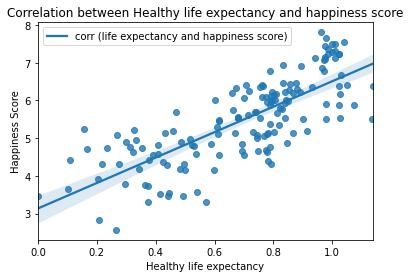

In [19]:
#Correlation between Happiness Score and life expectancy
new = df_final.filter(['Healthy life expectancy','Score'], axis=1)
fig = sns.regplot(x='Healthy life expectancy',y='Score',data=new)
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness Score")
plt.title("Correlation between Healthy life expectancy and happiness score")
plt.legend(labels=['corr (life expectancy and happiness score)'])